# Nettoyage des données

## Import des bibliothèques

In [1]:
import pandas as pd
import os
import glob
from datetime import datetime
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import du dataset

In [2]:
repertoire_data_processed = Path.cwd().parent.parent / "data" / "processed"

try:
    path_dataset = next(repertoire_data_processed.glob("01_dataset_jointure.csv"))
    print(f"Fichier trouvé : {path_dataset}")
    
    # Lecture
    df = pd.read_csv(path_dataset)
except StopIteration:
    print("Erreur : Le fichier 'dataset.csv' est introuvable dans le dossier.")

Fichier trouvé : C:\Users\julie\Desktop\01. Fil Rouge\data\processed\01_dataset_jointure.csv


In [3]:
df

,date,annee,trimestre,mois,demandeur_total_abcd_total,demandeur_homme_abcd_total,demandeur_femme_abcd_total,demandeur_total_abcd_moins25,demandeur_total_abcd_2549,demandeur_total_abcd_plus50,...,ipc,isj,ipc_energie_only,indicateur_climat_affaires,indicateur_climat_emploi,indicateur_retournement_conjoncturel,pib,ict,nb_defaillances_entreprise,nb_interimaires
0,1990-01-01,1990,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,115.7,NaN,1.0,388956.0,NaN,3998.0,NaN
1,1990-02-01,1990,1,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,113.5,NaN,0.9,NaN,NaN,3815.0,NaN
2,1990-03-01,1990,1,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,111.5,NaN,0.9,NaN,NaN,4304.0,NaN
3,1990-04-01,1990,2,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,110.9,NaN,0.7,391046.0,NaN,3506.0,NaN
4,1990-05-01,1990,2,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,110.7,NaN,0.9,NaN,NaN,3744.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,2025-10-01,2025,4,10,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9,1.2,-5.6,96.5,94.7,-0.5,NaN,NaN,6364.0,NaN
432,2025-11-01,2025,4,11,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9,1.0,-4.6,97.7,96.4,-0.3,NaN,NaN,NaN,NaN
433,2025-12-01,2025,4,12,NaN,NaN,NaN,NaN,NaN,NaN,...,0.8,NaN,-6.8,98.7,94.5,0.1,NaN,NaN,NaN,NaN
434,2026-01-01,2026,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Type de données

In [4]:
df.dtypes

date                                     object
annee                                     int64
trimestre                                 int64
mois                                      int64
demandeur_total_abcd_total              float64
demandeur_homme_abcd_total              float64
demandeur_femme_abcd_total              float64
demandeur_total_abcd_moins25            float64
demandeur_total_abcd_2549               float64
demandeur_total_abcd_plus50             float64
demandeur_homme_abcd_moins25            float64
demandeur_homme_abcd_2549               float64
demandeur_homme_abcd_plus50             float64
demandeur_femme_abcd_moins25            float64
demandeur_femme_abcd_2549               float64
demandeur_femme_abcd_plus50             float64
nb_offres_france_travail                float64
population_active                       float64
taux_chomage_insee                      float64
taux_chomage_ocde                       float64
taux_euribor_3m                         

Commentaires : 
- Toutes les variables sont au format Float
- à noter que "dteday" est défini comme un objet. On peut le transformer en un timestamp

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.describe()

,date,annee,trimestre,mois,demandeur_total_abcd_total,demandeur_homme_abcd_total,demandeur_femme_abcd_total,demandeur_total_abcd_moins25,demandeur_total_abcd_2549,demandeur_total_abcd_plus50,...,ipc,isj,ipc_energie_only,indicateur_climat_affaires,indicateur_climat_emploi,indicateur_retournement_conjoncturel,pib,ict,nb_defaillances_entreprise,nb_interimaires
count,436,436.000000,436.000000,436.000000,1.200000e+02,1.200000e+02,1.200000e+02,120.000000,1.200000e+02,1.200000e+02,...,422.000000,421.000000,422.000000,434.000000,422.000000,434.000000,145.000000,113.000000,432.000000,103.000000
mean,2007-12-31 18:06:36.330275328,2007.545872,2.486239,6.451835,4.668581e+06,2.228288e+06,2.440292e+06,731065.000000,2.994098e+06,9.434183e+05,...,1.685308,1.478860,3.230095,100.092857,100.009479,0.182811,529179.234483,85.636283,4471.835648,661273.427517
min,1990-01-01 00:00:00,1990.000000,1.000000,1.000000,3.245200e+06,1.499000e+06,1.746200e+06,550800.000000,2.186700e+06,4.256000e+05,...,-0.700000,-0.100000,-18.300000,45.700000,42.000000,-1.000000,388956.000000,60.300000,703.000000,477838.210451
25%,1999-01-01 00:00:00,1999.000000,1.000000,3.000000,3.955625e+06,1.840175e+06,2.096250e+06,666225.000000,2.672400e+06,5.639250e+05,...,0.900000,0.700000,-1.500000,94.625000,94.000000,-0.700000,459345.000000,74.100000,3964.250000,593762.607550
50%,2007-12-16 12:00:00,2007.500000,2.000000,6.000000,4.274300e+06,2.090400e+06,2.304500e+06,735800.000000,2.911700e+06,7.038500e+05,...,1.600000,1.200000,2.050000,101.250000,100.950000,0.700000,546199.000000,88.200000,4684.500000,640411.444797
75%,2017-01-08 18:00:00,2017.000000,3.000000,9.000000,5.542725e+06,2.734375e+06,2.840000e+06,792925.000000,3.360350e+06,1.475775e+06,...,2.100000,1.700000,7.875000,107.100000,107.200000,0.900000,590306.000000,96.400000,5369.750000,730857.542042
max,2026-02-01 00:00:00,2026.000000,4.000000,12.000000,6.107200e+06,2.968900e+06,3.138300e+06,867100.000000,3.710700e+06,1.597700e+06,...,6.300000,6.100000,33.100000,121.000000,120.000000,1.000000,661062.000000,112.800000,6897.000000,821378.102512
std,NaN,10.443948,1.123334,3.476684,8.861655e+05,4.753782e+05,4.177558e+05,83079.741638,4.349665e+05,4.295232e+05,...,1.188293,1.127093,7.499034,9.920619,9.977588,0.819373,81043.124941,14.409341,1240.152331,89845.599252


Commentaire : ATTENTION aux variables d'indices !!!

- indicateur_retournement_conjoncturel
- ipc_energie_only
- ipc
- isj

à recalculer en premier lieu !

# Valeurs manquantes

### La problématique

Nous avons de nombreuses sources de données, chacune présentant des périodes et des fréquences de mises à jour différentes.

| Titre (Variable) | Fréquence | Date début | Date fin |
| :--- | :--- | :--- | :--- |
| DEFM Total ABCDE (`demandeur_total_abcd_total`) | Trimestrielle | 01/01/1996 | 30/06/2025 |
| DEFM Hommes ABCDE (`demandeur_homme_abcd_total`) | Trimestrielle | 01/01/1996 | 30/06/2025 |
| DEFM Femmes ABCDE (`demandeur_femme_abcd_total`) | Trimestrielle | 01/01/1996 | 30/06/2025 |
| DEFM -25 ans ABCDE (`demandeur_total_abcd_moins25`) | Trimestrielle | 01/01/1996 | 30/06/2025 |
| DEFM 25-49 ans ABCDE (`demandeur_total_abcd_2549`) | Trimestrielle | 01/01/1996 | 30/06/2025 |
| DEFM 50 ans et plus ABCDE (`demandeur_total_abcd_plus50`) | Trimestrielle | 01/01/1996 | 30/06/2025 |
| DEFM Hommes -25 ans ABCDE (`demandeur_homme_abcd_moins25`) | Trimestrielle | 01/01/1996 | 30/06/2025 |
| DEFM Hommes 25-49 ans ABCDE (`demandeur_homme_abcd_2549`) | Trimestrielle | 01/01/1996 | 30/06/2025 |
| DEFM Hommes 50 ans+ ABCDE (`demandeur_homme_abcd_plus50`) | Trimestrielle | 01/01/1996 | 30/06/2025 |
| DEFM Femmes -25 ans ABCDE (`demandeur_femme_abcd_moins25`) | Trimestrielle | 01/01/1996 | 30/06/2025 |
| DEFM Femmes 25-49 ans ABCDE (`demandeur_femme_abcd_2549`) | Trimestrielle | 01/01/1996 | 30/06/2025 |
| DEFM Femmes 50 ans+ ABCDE (`demandeur_femme_abcd_plus50`) | Trimestrielle | 01/01/1996 | 30/06/2025 |
| Offres d'emploi France Travail (`nb_offres_france_travail`) | Mensuelle | 01/01/2015 | 30/09/2025 |
| Population active (OIT) (`population_active`) | Annuelle | 01/01/1990 | 31/12/2024 |
| Taux de chômage (INSEE) (`taux_chomage_insee`) | Annuelle | 01/01/1975 | 31/12/2024 |
| Taux de chômage (OCDE) (`taux_chomage_ocde`) | Mensuelle | 01/01/1990 | 31/10/2025 |
| Euribor 3-month (`taux_euribor_3m`) | Mensuelle | 31/01/1994 | 31/12/2025 |
| Main refinancing operations (`MRO`) | Ponctuelle | 01/01/1999 | 11/06/2025 |
| Indice des prix à la consommation (`ipc`) | Mensuelle | 01/01/1991 | 31/12/2025 |
| Inflation sous-jacente (`isj`) | Mensuelle | 01/01/1991 | 30/11/2025 |
| IPC ENERGIE (`ipc_energie_only`) | Mensuelle | 01/01/1991 | 31/12/2025 |
| Climat des affaires (`indicateur_climat_affaires`) | Mensuelle | 01/01/1977 | 31/12/2025 |
| Climat de l'emploi (`indicateur_climat_emploi`) | Mensuelle | 01/01/1991 | 31/12/2025 |
| Retournement conjoncturel (`indicateur_retournement_conjoncturel`) | Mensuelle | 01/01/1988 | 31/12/2025 |
| Produit intérieur brut total (`pib`) | Trimestrielle | 01/01/1949 | 30/09/2025 |
| Indice du coût du travail (`ict`) | Trimestrielle | 01/01/1988 | 30/09/2025 |
| Défaillances d'entreprises (`nb_defaillances_entreprise`) | Mensuelle | 31/01/1990 | 31/10/2025 |
| L'emploi intérimaire (`nb_interimaires`) | Trimestrielle | 01/01/2000 | 30/09/2025 |

Le dataset à une granularité maximale au mois mais certaines variables sont annualisées.

Pour régler ce problème, nous pourrions **appliquer la dernière valeur connue jusqu'à la prochaine observation valide**, pour les variables trimestrielles et annuelles.


## Apercu des valeurs manquantes

In [7]:
df.isna().any()

date                                    False
annee                                   False
trimestre                               False
mois                                    False
demandeur_total_abcd_total               True
demandeur_homme_abcd_total               True
demandeur_femme_abcd_total               True
demandeur_total_abcd_moins25             True
demandeur_total_abcd_2549                True
demandeur_total_abcd_plus50              True
demandeur_homme_abcd_moins25             True
demandeur_homme_abcd_2549                True
demandeur_homme_abcd_plus50              True
demandeur_femme_abcd_moins25             True
demandeur_femme_abcd_2549                True
demandeur_femme_abcd_plus50              True
nb_offres_france_travail                 True
population_active                        True
taux_chomage_insee                       True
taux_chomage_ocde                        True
taux_euribor_3m                          True
MRO                               

In [8]:
df.isna().sum()

date                                      0
annee                                     0
trimestre                                 0
mois                                      0
demandeur_total_abcd_total              316
demandeur_homme_abcd_total              316
demandeur_femme_abcd_total              316
demandeur_total_abcd_moins25            316
demandeur_total_abcd_2549               316
demandeur_total_abcd_plus50             316
demandeur_homme_abcd_moins25            316
demandeur_homme_abcd_2549               316
demandeur_homme_abcd_plus50             316
demandeur_femme_abcd_moins25            316
demandeur_femme_abcd_2549               316
demandeur_femme_abcd_plus50             316
nb_offres_france_travail                307
population_active                       399
taux_chomage_insee                      399
taux_chomage_ocde                         4
taux_euribor_3m                          50
MRO                                     390
ipc                             

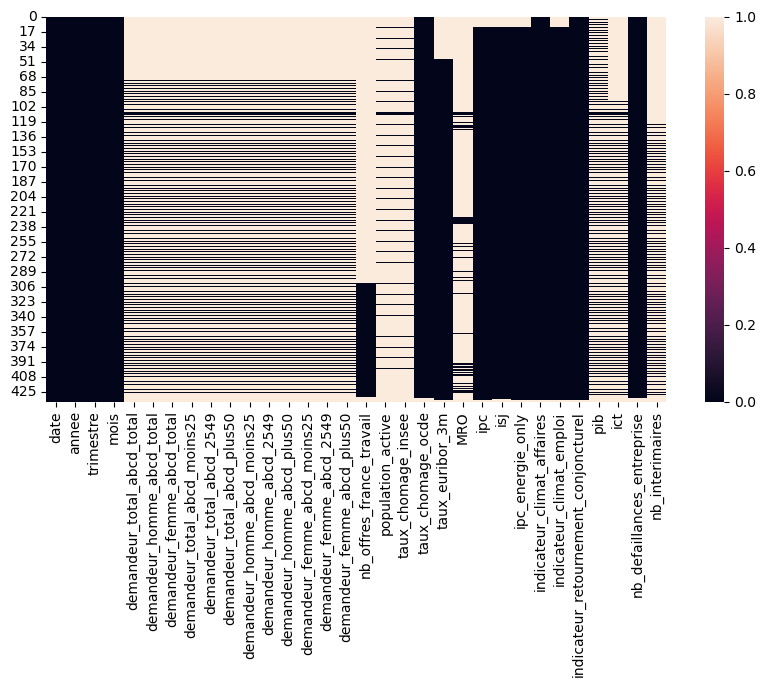

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isna());

### Application de FFILL()

In [10]:
df_filled = df.ffill()

In [11]:
df_filled

,date,annee,trimestre,mois,demandeur_total_abcd_total,demandeur_homme_abcd_total,demandeur_femme_abcd_total,demandeur_total_abcd_moins25,demandeur_total_abcd_2549,demandeur_total_abcd_plus50,...,ipc,isj,ipc_energie_only,indicateur_climat_affaires,indicateur_climat_emploi,indicateur_retournement_conjoncturel,pib,ict,nb_defaillances_entreprise,nb_interimaires
0,1990-01-01,1990,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,115.7,NaN,1.0,388956.0,NaN,3998.0,NaN
1,1990-02-01,1990,1,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,113.5,NaN,0.9,388956.0,NaN,3815.0,NaN
2,1990-03-01,1990,1,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,111.5,NaN,0.9,388956.0,NaN,4304.0,NaN
3,1990-04-01,1990,2,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,110.9,NaN,0.7,391046.0,NaN,3506.0,NaN
4,1990-05-01,1990,2,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,110.7,NaN,0.9,391046.0,NaN,3744.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,2025-10-01,2025,4,10,5612100.0,2749800.0,2862300.0,792800.0,3318200.0,1501100.0,...,0.9,1.2,-5.6,96.5,94.7,-0.5,661062.0,112.8,6364.0,705598.523373
432,2025-11-01,2025,4,11,5612100.0,2749800.0,2862300.0,792800.0,3318200.0,1501100.0,...,0.9,1.0,-4.6,97.7,96.4,-0.3,661062.0,112.8,6364.0,705598.523373
433,2025-12-01,2025,4,12,5612100.0,2749800.0,2862300.0,792800.0,3318200.0,1501100.0,...,0.8,1.0,-6.8,98.7,94.5,0.1,661062.0,112.8,6364.0,705598.523373
434,2026-01-01,2026,1,1,5612100.0,2749800.0,2862300.0,792800.0,3318200.0,1501100.0,...,0.8,1.0,-6.8,98.7,94.5,0.1,661062.0,112.8,6364.0,705598.523373


In [12]:
df_filled.isna().sum()

date                                      0
annee                                     0
trimestre                                 0
mois                                      0
demandeur_total_abcd_total               72
demandeur_homme_abcd_total               72
demandeur_femme_abcd_total               72
demandeur_total_abcd_moins25             72
demandeur_total_abcd_2549                72
demandeur_total_abcd_plus50              72
demandeur_homme_abcd_moins25             72
demandeur_homme_abcd_2549                72
demandeur_homme_abcd_plus50              72
demandeur_femme_abcd_moins25             72
demandeur_femme_abcd_2549                72
demandeur_femme_abcd_plus50              72
nb_offres_france_travail                302
population_active                         0
taux_chomage_insee                        0
taux_chomage_ocde                         0
taux_euribor_3m                          48
MRO                                     108
ipc                             

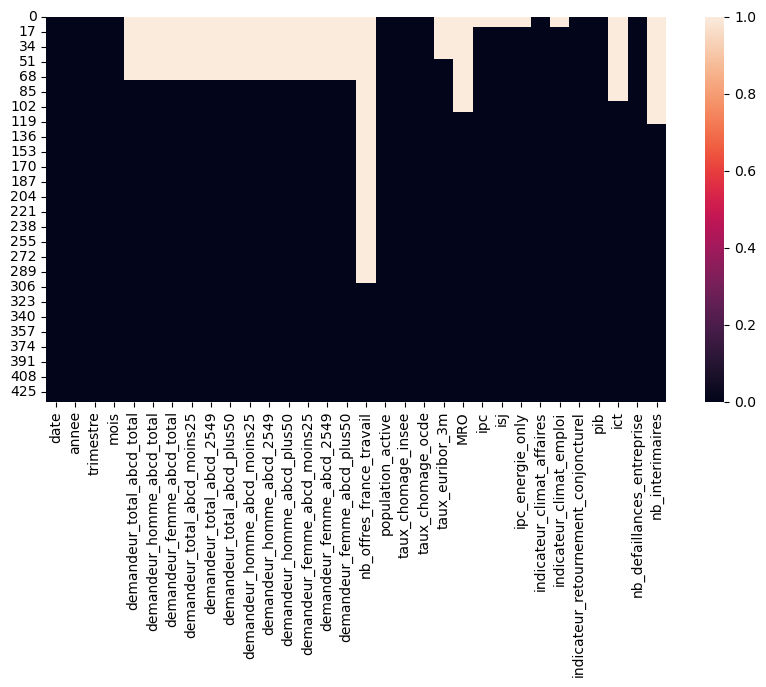

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(df_filled.isna());

à noter que la variable Offres d'emploi France Travail (`nb_offres_france_travail`) ne débute qu'en 2015 :

| Titre (Variable) | Fréquence | Date début | Date fin |
| :--- | :--- | :--- | :--- |
...
| Offres d'emploi France Travail (`nb_offres_france_travail`) | Mensuelle | 01/01/2015 | 30/09/2025 |
...

## Visualisation du dataframe final

In [14]:
df_filled.tail(20)

,date,annee,trimestre,mois,demandeur_total_abcd_total,demandeur_homme_abcd_total,demandeur_femme_abcd_total,demandeur_total_abcd_moins25,demandeur_total_abcd_2549,demandeur_total_abcd_plus50,...,ipc,isj,ipc_energie_only,indicateur_climat_affaires,indicateur_climat_emploi,indicateur_retournement_conjoncturel,pib,ict,nb_defaillances_entreprise,nb_interimaires
416,2024-07-01,2024,3,7,5412400.0,2637700.0,2774700.0,692700.0,3232500.0,1487200.0,...,2.3,1.5,8.5,94.4,97.2,-1.0,655027.0,110.1,5843.0,726325.294868
417,2024-08-01,2024,3,8,5412400.0,2637700.0,2774700.0,692700.0,3232500.0,1487200.0,...,1.8,1.7,0.4,96.6,98.4,0.7,655027.0,110.1,1599.0,726325.294868
418,2024-09-01,2024,3,9,5412400.0,2637700.0,2774700.0,692700.0,3232500.0,1487200.0,...,1.1,1.4,-3.3,97.4,98.6,-0.8,655027.0,110.1,6314.0,726325.294868
419,2024-10-01,2024,4,10,5491700.0,2678900.0,2812800.0,716800.0,3279000.0,1495900.0,...,1.2,1.4,-2.0,97.0,97.4,-0.9,654734.0,111.3,6554.0,713974.330136
420,2024-11-01,2024,4,11,5491700.0,2678900.0,2812800.0,716800.0,3279000.0,1495900.0,...,1.3,1.5,-0.7,96.1,98.4,-0.7,654734.0,111.3,6099.0,713974.330136
421,2024-12-01,2024,4,12,5491700.0,2678900.0,2812800.0,716800.0,3279000.0,1495900.0,...,1.3,1.3,1.2,95.0,96.5,-0.9,654734.0,111.3,5752.0,713974.330136
422,2025-01-01,2025,1,1,5738000.0,2811000.0,2927000.0,866800.0,3357600.0,1513600.0,...,1.7,1.4,2.7,95.4,97.0,-0.7,655389.0,112.3,5948.0,710419.927973
423,2025-02-01,2025,1,2,5738000.0,2811000.0,2927000.0,866800.0,3357600.0,1513600.0,...,0.8,1.3,-5.8,95.9,93.5,-0.6,655389.0,112.3,5826.0,710419.927973
424,2025-03-01,2025,1,3,5738000.0,2811000.0,2927000.0,866800.0,3357600.0,1513600.0,...,0.8,1.3,-6.6,96.6,96.4,-0.6,655389.0,112.3,6382.0,710419.927973
425,2025-04-01,2025,2,4,5612100.0,2749800.0,2862300.0,792800.0,3318200.0,1501100.0,...,0.8,1.3,-7.8,97.1,97.8,-0.3,657523.0,112.2,5863.0,709895.580836


# Export du nouveau dataset au format CSV

In [15]:
repertoire_data_processed = Path.cwd().parent.parent / "data" / "processed"
chemin_export = repertoire_data_processed / "02_dataset_clean.csv"

df_filled.to_csv(chemin_export, index=False, encoding='utf-8')